1. Ensemble
1. 트리의 앙상블
    1. 트리 앙상블: 랜덤 포레스트
    1. 트리 앙상블: 엑스트라트리
1. Boosting알고리즘
    1. AdBoost
    1. 그레이디언트 부스팅
    1. XGBoost
    1. LightGBM
    1. CatBoost

# 와인 데이터

와인중 레드와인, 화이트 와인이 있는데 색을 모르는 상태에서 와인을 분류활 수 있을까? 

 - 캘리포니아 어바인 대학에서 제공하는 와인 데이터세트를 이용해서 과정을 진행해 보자.
 - 내장된 데이터세트가 없어서 외부 데이터를 사용하자.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms.tournament import score_sequence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sympy.physics.vector.printing import params

In [34]:
# Wine data (simple)
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)



# 앙상블 (Ensemble)


머신러닝의 학습 알고리즘에 사용되는 방법은 많은 부분 통계학의 방법을 사용하고 있다. 통계는 데이터의 샘플링, 해석, 처리와 그것을 바탕으로 전체 데이터를 이해할 수 있는 모델을 만드는 과정이다. 머신러닝도 학습 데이터를 분석하고 유용한 특징을 추출한 후 새로운 데이터를 예측할 수 있는 일반화된 모델을 만들어 간다.


**앙상블 Enemble** (모델결합)은 ***여러 머신러닝 모델을 연결해 더 강력한 모델을 만드는 기법*** 이다. 앙상블 학습을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다.
- 여러 사람의 의견을 듣고 결정하는 집단 지성의 개념.
- 모르는 지식을 얻기 위해서 무작정 학습하는 것 보다, 전문가의 조언이 빠르고, 선택의 범위를 좁힐 수 있다. 


앙상블 학습 유형은 전통적으로 보팅(Voting), 배깅(bagging), 부스팅(boosting) 과 스태킹을 포함한 다양한 앙상블 방법이 있다.

### 1) Boosting

부스팅이란 무작위로 선택하는 것 보다 약간 가능성이 높은 규칙(weak learner/classifier)들을 결합시켜 보다 정확한 예측 모델을 만들어 내는 것을 말한다. 즉 약한 것들을 여러개 결합해 강한 모델을 만들어 간다는 의미이다.

> Boosting 역사는 1989년 Schapire가 제대로 된 모델을 발표했으며, 그루 Freund가 좀 더 효율적인 알고리즘을 발표한다. 부스팅은 주로 classification에 관련한 문제를 해결하기 위해 고안되었지만, 통계 등에도 사용하는 regression에도 사용할 수 있다. 일부는 90년대 개발된 최고의 머신러닝 알고리즘 중 하나라고 평가하고 있다. Schapire와 Freund는 AdaBoost(Adaptive boosting) 이라는 유명한 학습 알고리즘을 발표한다.



#### [부스팅의 학습 방법]

weak learner 는 무작위로 선정하는 것 보다 성공 확률이 높은, 오차율이 50% 이하인 학습 규칙을 말한다. 약한 학습기를 선정하는 방법은 머신 러닝 알고리즘을 적용해 서로 다른 분포를 갖도록 해주는 것이다. 매번 기본 러닝 알고리즘을 적용할 때마다 새 약한 학습기를 만들며 이 과정을 반복적으로 수행한다. 반복 수행 후 약한 학습기를 부스팅 알고리즘으로 묶어서 strong learner를 만든다. 이 과정은 아래 그림 같은 과정을 반복한다:



<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FclQ4UJ%2FbtqMDznC9E7%2Fqqwm92Jw6p4xQwcIhrAUKK%2Fimg.jpg' width='550'>


### 2) Bagging (Bootstrap aggregating)

예를 들어 전세게 남성들의 평균 키를 구하는 경우를 생각해 보면, 제일 정확한 방법은 전세계 남자의 키를 잰 후 평균을 구하는 것일 것이다. 이것은 불가능 하기 때문에 적절한 방법을 통해 표본을 추출하고 그 표본에서 전세계 남성의 평균 키를 추정하는 것이 합리적인 대안이 될 것이다. 이런 과정을 ***Bootstrap*** 이라 하고, 

Bootstrapping은 전체 모집단의 분포를 확실하게 알 수 없는 경우 표본을 취한 후 그 표본이 전체 집단을 대표한다는 가정에서 전체의 분포를 예측할 수 있게 한다. 표본을 취하면 그 표본에 대한 본포는 정확하게 구할 수 있다. 표본이 전체를 대표하므로 표본에서 많은 횟수에 걸쳐 (동일한 갯수의) 샘플을 복원 추출(resample with replacement)한 후 각 샘플에 대한 분포를 구한다. 그 후 전체 표본의 분포와 샘플 간의 본포의 관계를 통해 전체 집단의 분포를 유추하는 방식이 부트스트래핑이며 1979년에 Bradley Efron 이 처음 언급하며 쓰이기 시작했다.


<img src='https://miro.medium.com/v2/resize:fit:1400/1*4ybgcSuZqQ0L7qkRZiIR9Q.png' width=600>


Bagging은 머신러닝 통계에 부트스트랩을 사용해 정확도를 높이고 안정선을 높이는 방식이다.

### Bagging과 Boosting 차이

부스팅과 배깅은 모델결합(앙상블) 방식이라는 관점에서 동일하다
 - 배깅은 부트스트랩이 서로 독립적인 관계를 갖는다. 
     - 하지만 부스팅은 순차적으로 처리가 되고, 에러가 발생하면 그 에러의 가중치를 올리기 위해 현재 weak learner가 이전 weak learner에 영향을 받는다.
 - 부스팅은 최종적으로 weighed vote를 하지만 bagging은 단순 vote를 한다.
 - bagging은 분산을 줄이는 것이 주 목적이지만, boosting은 바이어스를 줄이는 것이 목적이다.
 - 잡음이 없는 데이터에 대해서 boostring이 bagging보다 우수하다
 - Bagging 은 overfitting 문제를 해결할 수 있지만 Boosting 은 overfitting에서 자유롭지 못하다.
 

https://www.slideshare.net/freepsw/boosting-bagging-vs-boosting

## - 앙상블 알고리즘 유형

머신러닝에 이런 종류 모델이 많지만 그 중 **랜덤 포레스트 Random Forest**와 **그래디언트 부스팅 Gradient boosting** 앙상블 모델이 분류와 회귀 문제의 다양한 데이터 세트에서 효과적이라 입증되었다. 랜덤 포레스트와 그래디언트 부스팅 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용한다.

**부스팅 계열 앙상블 알고리즘** 의 인기/강세가 이어져 - 캐글에서 매력적 솔루션으로 불리는 **XGBoost**, XGboost 와 유사한 예측 성능을 가지며 빠른 수행 속도를 가진 **LightGBM**, 여러 가지 모델의 결과를 기반으로 메타 모델을 수립하는 스태킹(stacking)을 포함해 다양한 유형의 앙상블 알고리즘이 머신러닝의 선도 알고리즘으로 인기를 얻고 있다.

XGBoost, LightGBM 과 같은 최신 앙상블 모델 한 두 개만 알고 있어도 정형 데이터의 분류나 회귀 분야에서 예측 성능이 매우 뛰어난 모델을 쉽게 만들수 있다. 

# 트리의 앙상블

## - 랜덤포레스트

앙상블 알고리즘 중 비교적 빠른 수행 속도를 가진다. 랜덤 포레스트는 기본적으로 트리 기반으로 조금씩 다른 여러 **결정트리** 의 묶음이다. 결정트리의 쉽고 직관적 장점을 그대로 가지고 있다. 랜던포레스트 뿐만 아니라 부스팅 기반의 앙상블 알고리즘은 대부분 결정 트리 기반 알고리즘을 채택하고 있다.

> 랜덤 포레스트(Random Forest, Randomized trees)는 2001년 레오 브라이만(Leo Breiman)이 제안한 머신러닝 알고리즘이다. 집단 학습을 기반으로 고정밀 분류, 회귀, 클러스터링 등을 구현한다.

이름 자체로 유추할 수 있듯 랜덤 포레스트는 ***결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만든다*** . 그리고 각 결정 트리의 예측을 사용해 최종 예측을 만든다. 

<img src='https://i.imgur.com/bkbxgNC.png' width=600>
 - https://www.tibco.com/reference-center/what-is-a-random-forest
 
학습 전용 데이터를 기반으로 다수의 의사결정 트리를 만들고 만들어진 의사결정 트리를 기반으로 다수결로 결과를 유도하므로 높은 정밀도를 자랑한다. 학습 데이터를 무작위로 샘플링해서 만들어진 다수의 의사결정 트리를 사용하기 때문에 랜덤 포레스트라고 불린다. 의사결정 트리는 일반적으로 부정확한 학습 방법으로 분류되지만 집단 학습을 하면 정밀도를 굉장히 높일 수 있다.


랜덤 포레스트는 훈련 데이터에 **과대적합을 회피할 수** 있는 방법이다. 각 트리는 비교적 정확한 예측을 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는데 기초한다. 즉 잘 작동해서 **_서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균해서 과대적합한 양을 줄일 수 있다_**. 이렇게 하면 트리 모델의 예측 성능이 유지 되면서 과대적합이 줄어드는 것이 수학적으로 증명되었다. 




이런 전략을 구현하려면 결정 트리를 많이 만들고 각각 트리는 타깃 예측을 잘 해야 하고, 다른 트리와 구별되야 한다. 랜덤 포레스트는 서로 달라 지도록 무작위로 트리 생성을 한다. 각 트리에 데이터 포인트를 무작위로 선택하는 것과 분할 테스트에서 특성을 무작위로 선택하는 방법이 있다.

랜덤 포레스트는 훈련을 통해 구성해놓은 다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는, 일종의 인기 투표(?) 같은 거다.

<img src='https://i.imgur.com/piPMmFv.png' width=600>
 - https://hleecaster.com/ml-random-forest-concept/

랜덤 포레스트는  결정 트리를 랜덤하게 만들어 각 결정 트리를 훈련하기 위한 데이터를 랜덤하게 만드는데, 이 데이터를 만드는 방법이 독특하다. 우리가 입력한 훈련 데이터에서 랜덤하게 샘플을 추출하여 훈련 데이터를 만든다. 이때 한 샘플이 중복되어 추출될 수도 있다. 이렇게 만들어진 샘플을 **부트스트랩 샘플** 이라고 부른다.

<img src='https://i.imgur.com/FV5cjUM.png' width=600>

 - https://velog.io/@vvakki_/%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%EC%97%90%EC%84%9C%EC%9D%98-%EB%B3%80%EC%88%98-%EC%A4%91%EC%9A%94%EB%8F%84Variable-Importance-3%EA%B0%80%EC%A7%80



또한 각 노드를 분할할 때 전체 특성 중에서 일부 특성을 무작위로 고른 다음 이 중에서 최선의 분할을 찾는다. 분류 모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼의 특성을 선택한다. 즉 4개의 특성이 있다면 2개를 랜덤하게 선택하여 사용한다. 다만 회귀 모델인 RandomForestRegressor는 전체 특성을 사용한다.

사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련한다. 그다음 분류일 때는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼는다. 회귀일 때는 각 트리의 예측을 평균한다.

랜덤 포레스트는 랜덤하게 선택한 샘플과 특성을 사용하기 때문에 훈련 세트에 과대적합되는 것을 막아주고 검증 세트와 테스트 세트에서 안정적인 성능을 얻을 수 있다. 기본 매개변수만으로도 아주 좋은 결과를 낸다.


### 랜덤포레스트 장.단점

<장점>
 - 분류,회귀 모두 널리 쓰이고 성능과 정확도 좋다
 - 간편하고 빠르다
 - 큰 데이터 세트에도 잘 되고 많은 입력 변수를 다룰 수 있ㄷ.
 
<단점>
 - 속도와 메모리 비용이 상대적(선형분류 대비)으로 크다
 - 많은 트리는 큰 시간과 메모리 소비
 - 트리 깊이 개수 설정이 잘못되면 과적합 발생

## 랜덤포레스트 와인 분류

이제 사이킷런의 RandomForestClassifier 클래스를 화이트 와인을 분류하는 문제에 적용해 보자.

```python
class RandomForestClassifier(
    n_estimators: Int = 100,
    *,
    criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    max_depth: Int | None = None,
)
```

RandomForestCalssifier는 기본적으로 100개의 결정 트리를 사용한다. n_jobs 매개변수를 -1로 지정하여 모든 CPU 코어를 사용하는 것이 좋다. cross_validate() 함수를 사용해 교차 검증을 해보자. return_train_score 매개변수를 True로 지정하면 검증 점수 뿐만 아니라 훈련 세트에 대한 점수도 같이 반환한다. 

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rf = RandomForestClassifier(n_jobs=-1, random_state=50)

In [36]:
score = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)

In [37]:
np.mean(score['train_score']), np.mean(score['test_score'])

(0.9974503966084433, 0.8883997186643962)

출력된 결과를 보면 훈련 세트에 과대적합된 것 같다

#### 특성 중요도

랜덤 포레스트는 결정 트리의 앙상블이기 때문에 DecisionTreeClassifier가 제공하는 중요한 매개변수를 모두 제공한다. criterion, max_depth, max_features, min_samples_split, min_impurity_decrease, min_samples_leaf 등이다. 

또한 결정트리의 큰 장점 중 하나인 특성 중요도를 계산한다. 특성 중요도는 데이터 컬럼에 해당하는 특성에 대해서, 각 결정 트리의 특성 중요도를 취합한 것이다. 

랜덤 포레스트 객체의 `.feature_importances_` 속성으로 중특성 중요도를 산출한다. 앞의 랜덤 포레스트 모델을 훈련 세트에 훈련한 후 특성 중요도를 출력해 보자.

In [38]:
rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=50)

앞서 결정 트리에서 만든 특성 중요도와 비교해보면 각 특성 알코올도수, 당도, pH에서, 두 번째 특성인 당도의 중요도가 감소하고 알코올 도수와 pH특성의 중요도가 조금 상승했다. 이런 이유는 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문이다. 그 결과 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻는다. 이는 과대적합을 줄이고 일반화 성능을 높이는데 도움이 된다.

In [39]:
# alcohol, sugar, pH
rf.feature_importances_

array([0.23231778, 0.50074911, 0.26693312])

#### OOB 샘플

RandomForestClassifier에는 재미있는 기능이 하나 더 있는데, 자체적으로 모델을 평가하는 점수를 얻을 수 있다. 랜덤 포레스트는 훈련 세트에서 중복을 허용하여 부트스트랩 샘플을 만들어 결정 트리를 훈련한다고 했다. 이때 부트스트랩 샘플에 포함되지 않고 남는 샘플이 있다. 이런 샘플을 OOB 샘플이라고 한다. 이 점수를 얻으려면 RandomForestClassifier 클래스의 oob_score 매개변수를 True로 지정해야한다. 이렇게 하면 랜덤 포레스트는 각 결정 트리의 OOB 점수를 평균하여 출력한다.

In [40]:
rf = RandomForestClassifier(oob_score=True, random_state=50, n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.oob_score_)

0.895516644217818


교차 검증에서 얻은 점수와 매우 비슷한 결과를 얻었다. ***OOB 점수를 사용하면 교차 검증을 대신할 수 있어서 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있다*** .

### ex) GridSearchCV 적용 실습

트리 기반 앙상블 알고리즘의 단점으로 하이퍼파라미터가 너무 많아서 튜닝에 많은 시간을 소모하는 것이다. 튜닝에 많으 시간을 들여보 성능이 크게 향상되지 않는 점이 아쉽다. 여기에 배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 일반적으로 다른 ML 알고리즘에 비해 많을 수 밖에 없다.

랜덤포레스트의 결정트리 파라미터와 거의 동일
- n_estimators: 결정 트리 개수. 기본 10개. 
- max_features: 결정 트리와 같다. 기본 auto로 전체 피처가 아니라 sqrt(전체개수) 만큼 참조
- max_depth, min_samples_leaf


이번에는 GridSearchCV 를 이용해 랜덤포레스트의 하이퍼 파라미터를 튜닝해 보자, 멀티코어 환경에서 RandomForestClassifier, GridSearchCV 의 인자 `n_jobs=-1` 파라미터를 사용하면 모든 CPU 코어를 사용할 수 있다.

다음 같이 주었을 때 Macbook pro 에서
 - 8코어: 50초 정도, 
 - 4코어 사용: 58초 정도

랜덤포레스트는 병렬 처리도 효과적으로 처리되서 뒤에 나오는 그래디언트 부스팅 보다 예측 성능이 약간 떨어져도 랜덤 포레스트로 일단 기반 모델을 먼저 구축하는 경우가 많다.

In [41]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {
    'n_estimators': [100],
    'criterion': ['gini'],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=50)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

CPU times: user 197 ms, sys: 43.3 ms, total: 241 ms
Wall time: 1.32 s


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [42]:
print(grid_cv.best_params_, grid_cv.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100} 0.872425691648443


In [43]:
clf = grid_cv.best_estimator_

In [44]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=50)

In [45]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       341
         1.0       0.90      0.92      0.91       959

    accuracy                           0.86      1300
   macro avg       0.83      0.82      0.82      1300
weighted avg       0.86      0.86      0.86      1300



피처의 중요도를 가시화 해보자,

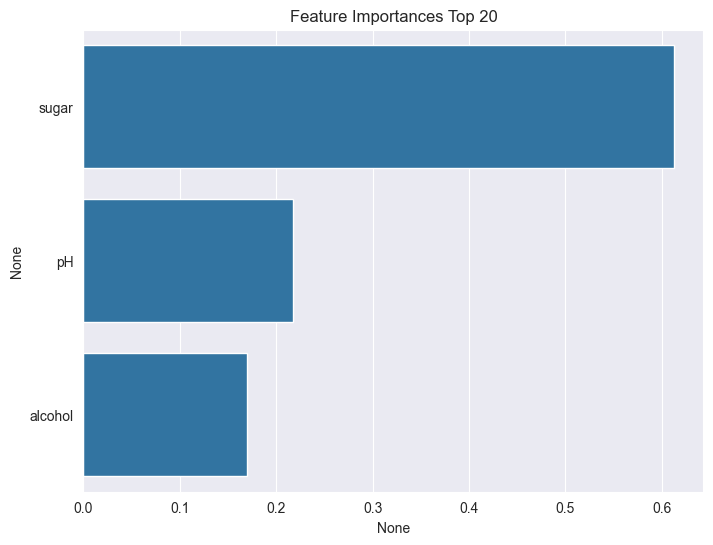

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ft_importances = pd.Series(clf.feature_importances_, index=['alcohol','sugar','pH'])
ft_top20 = ft_importances.sort_values(ascending=False)[:20] #top 20

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

## - 엑스트라트리

Extra Tree 는 랜덤 포레스트와 매우 비슷하게 동작한다. 기본적으로 100개의 결정 트리를 훈련한다. 랜덤 포레스트와 동일하게 결정 트리가 제공하는 대부분의 매개변수를 지원한다. 또한 전체 특성 중에 일부 특성을 랜덤하게 선택하여 노드를 분할하는 데 사용한다. 랜덤 포레스트와 엑스트라 트리의 차이점은 ***부트스트랩 샘플을 사용하지 않는다*** 는 점이다. 

즉 각 결정 트리를 만들 때 전체 훈련 세트를 사용한다. 대신 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할한다. 엑스트라 트리가 사용하는 결정트리는 splitter='random'인 결정트리이다. ***하나의 결정 트리에서 특성을 무작위로 분할한다면 성능은 낮아지겠지만 많은 트리를 앙상블 하기 때문에 과대적합을 막고 검증 세트의 점수를 높이는 효과가 있다*** . 

엑스트라 트리가 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련해야 한다. 하지만 랜덤으로 노드를 분할하기 때문에 빠른 계산 속도가 엑스트라 트리의 장점이다.
 
사이킷런에서 제공하는 엑스트라 트리는 ExtraTreesClassifier 이다.

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=50)
scores2 = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores2['train_score']), np.mean(scores2['test_score']))

0.9974503966084433 0.8860909158214259


랜덤 포레스트와 비슷한 결과가 나왔다. 와인 예제는 특성이 많지 않아 두 모델의 차이가 크지 않다.

엑스트라 트리도 랜덤 포레스트와 마찬가지로 특성 중요도를 제공한다. 알코올 도수, 당도, pH 순서 인데 결과를 보면 엑스트라 트리도 결정 트리보다 당도에 대한 의존성이 작다.



In [48]:
et.fit(X_train, y_train)
print(et.feature_importances_)

[0.19494194 0.52232625 0.28273181]


엑스트라 트리의 회귀 버전은 ExtraTreesRegressor 클래스이다.

# Boosting 알고리즘

부스팅은 전체 모델 성능을 향상시키기 위해 여러 모델이 반복적으로 추가되는 순차 앙상블 학습 기술입니다. 부스팅알고리즘은 약한 학습기를 순차적으로 학습-예측 하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가며 학습하는 방식이다. 부스팅의 대표적인 구현은 AdaBoost(Adaptive Boosting)과 Gradient Boosting 이 있다.

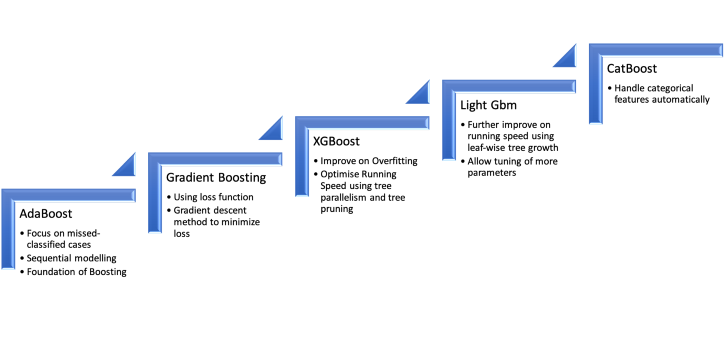
 - 부스팅 알고리즘의 발전
 
 Light Gbm과 CatBoost는 비슷한 타이밍에 출시되었으므로 하나가 다른 버전의 개선 된 버전이라고 말할 수 없습니다.

## - AdaBoost

AdaBoost는 적응 형 부스팅의 약자입니다. 적응 형이라고 부르는 이유는 알고리즘 이 이전 모델에서 분류되지 않은 케이스를 활용하고 분류되지 않은 케이스가 더 많은 가중치를 갖는 새로운 가중치 데이터 샘플 을 생성하기 때문 입니다. 이런 식으로 새로 추가 된 모델은 이전 모델의 '실수'를 해결하는 데 더 적응해야합니다.

AdaBoost는 개발 된 가장 초기의 부스팅 알고리즘 중 하나입니다. 요즘 거의 사용되지 않지만 대부분의 부스팅 알고리즘의 기초입니다.

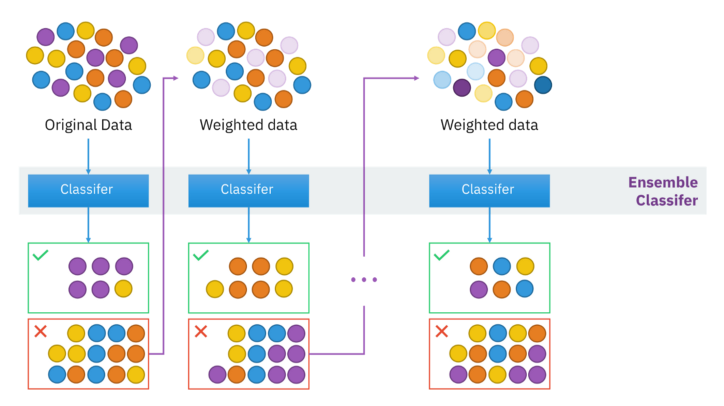


AdaBoost 는 오류 데이터에 가중치를 부여하며 부스팅을 수행한다.

참조: https://www.slideshare.net/freepsw/boosting-bagging-vs-boosting

<img src='https://image.slidesharecdn.com/mlstudyboostingv0-171128021615/95/boosting-bagging-vs-boosting-15-1024.jpg?cb=1511939004' width='600'>


위 그림 같이 +,- 로 된 피처 데이터 세트가 있다면
- Model1 학습기에서 위/아래로 수평 분류했을 때 잘못분류된 오류 데이터가 있다.
    - 다음 학습기를 위해 데이터 세트에 잘못 예측한 데이터에 가중치 부여한다.
- Model2 학습기에서 수직으로 분류 했을 때 잘못 분류된 오류 데이터
    - 데이터 세트에 잘못 예측한 데이터에 가중치 부여해 다음 학습기에 전달
- Model3 학습기에서 +,-로 분류하고 오류 데이터를 찾는다.
- 오른쪽 같이 1-3 학습기의 결합한 예측 결과다. 각 개별 학습기 보다 정확해 졋다.

각 개별 학습기 Model1~3 는 오른쪽 처럼 각각 가중치를 부여해 결합한다. 첫번째 학습기에 가중치 0.3, 두번째 0.5, 세번째 0.4 를 부여한 후 모두 결합해 예측을 수행한다.

In [49]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=50)
clf.fit(X_train, y_train)
pred_ada = clf.predict(X_test)

In [50]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       341
         1.0       0.89      0.90      0.90       959

    accuracy                           0.85      1300
   macro avg       0.80      0.80      0.80      1300
weighted avg       0.85      0.85      0.85      1300



## - GBM (Gradient Boosting Machine)

그레이디언트 부스팅은 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방법이다. 

- 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습 예측하면서 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선해 나가는 방식
- GBM은 가중치를 업데이트할때 경사 하강법을 사용하는것이 큰 차이

AdaBoost와 비교하여 그래디언트 부스팅은 분류되지 않은 케이스에 불이익을주지 않고 대신 손실 함수를 사용합니다. 손실 함수는 회귀에 대한 평균 평균 오류이거나 분류 문제에 대한 로그 손실 일 수 있습니다. 또한 경사 부스팅 알고리즘은 경사 하강 법을 사용하여 손실 함수를 지속적으로 최소화하여 최적의 지점을 찾습니다.

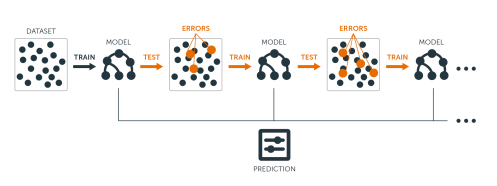

Gradient Boosting 방법은 이론적으로 AdaBoost보다 성능이 좋습니다. 그러나 과적 합 문제가 발생하기 쉽고 그라디언트 부스팅의 경우 런타임이 더 길어집니다. 조기 중지 조건을 설정하여 과적 합을 완화하고 런타임도 줄일 수 있습니다.


GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류/회귀가 가능하다. 사이킷런은 GradientBoostingClassifier 를 제공한다.

### GradienBoostingClassifier 사용

사이킷런의 GradienBoostingClassifier는 기본적으로 깊이가 3인 결정 트리를 100개 사용한다. ***깊이가 얕은 결정 트리를 사용하기 때문에 과대적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있다*** . 

> 참고: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost

앞서 배웠던 경사 하강법을 사용하여 트리를 앙상블에 추가한다. 분류에서는 로지스틱 손실 함수를 사용하고 회귀에서는 평균 제곱 오차 함수를 사용한다. 그레이디언트 부스팅은 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동한다.

```python
class GradientBoostingClassifier(
    *,
    loss: Literal['log_loss', 'deviance', 'exponential'] = "log_loss",
    learning_rate: Float = 0.1,
    n_estimators: Int = 100,
    subsample: Float = 1,
    criterion: Literal['friedman_mse', 'squared_error'] = "friedman_mse",
    min_samples_split: float = 2,
    min_samples_leaf: float = 1,
)
```

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier( random_state=50)
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

In [52]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       341
         1.0       0.91      0.92      0.91       959

    accuracy                           0.87      1300
   macro avg       0.83      0.82      0.83      1300
weighted avg       0.87      0.87      0.87      1300



과대적합이 거의 되지 않았다. 그레이디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강하다. 학습률을 증가시키고 트리의 개수를 늘리면 조금 더 성능이 향상될 수 있다.

In [53]:
gb2 = GradientBoostingClassifier(random_state=50)
scores3 = cross_validate(gb2, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores3['train_score']), np.mean(scores3['test_score']))

0.8881086892152563 0.8718505219515806


In [54]:
print(gb.feature_importances_)

[0.11908999 0.74879399 0.13211602]


결과를 보면 랜덤 포레스트보다 당도에 더 집중한다.

#### subsample

재미있는 매개변수가 하나 더 있다. 트리 훈련에 사용할 훈련 세트의 비율을 정하는 subsample이다. 이 매개변수의 기본값은 1.0으로 전체 훈련 세트를 사용한다. 하지만 subsample이 1보다 작으면 훈련 세트의 일부를 사용한다. 이는 마치 경사 하강법 단계마다 일부 샘플을 랜덤하게 선택하여 진행하는 확률적 경사 하강법이나 미니배치 경사 하강법과 비슷하다.

### ex) GBM에서 하이퍼 파라미터 튜팅

트리 기반의 기본 파라미터에 더해서 경사하강법에 관련한 파라미터들:

- loss: 경사하강법에 사용할 비용 함수를 지정. 기본 deviance 를 사용.
- learning_rate: 학습 진행시 적용하는 학습률로 0~1 사이로 기본은 0.1이다.
    - 너무 작은 값은 예측 성능이 높아질 수 있으나 수행 시간이 오래 걸린다.
    - n_estimators 와 상호보완적으로 조합해 사용한다. 학습률을 작게하고 n_estimators를 크게하면 한계까지 예측 성능이 조금씩 좋아질 수 잇다. 하지만 수행ㄱ시간이 오래 걸리는 단점과 성능이 현격히 좋지는 않다.
- n_estimators: weak learner 갯수. weak learner 가 순차적으로 오류 보정하므로 크면 예측 성능이 좋아질 수 있다. 수행시간이 오래 걸릴 수 있다. 기본 100.
- subsample: weak learner 가 학습에 사요하는 데이터의 샘플링 비율. 기본 1로 100% 사용한다. 과적합이 염려되면 이를 1보다 작은 값으로 설정한다.



GridSearchCV 를 이용해 하이퍼파라미터를 최적화 해보자. 사용자 행동 데이터 세트 같이 데이터 양이 많은 것을 GBM 으로 테스트 하려면 시간이 많이 걸린다. 여기서는 간략히 하겠다.

In [55]:
%%time
from sklearn.model_selection import GridSearchCV







CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 3.81 μs


결과로 도출되는 하이퍼파라미터 성능.

GradientSearchCV 에 의해 learning_rate=0.05, n_estimators=500 일 때 2개의 교차 검증 세트에서 90.1% 정확도로 최고가 나왔다. 이 설정으로 적용해 예측 정확도를 확인해 보자,,,

In [56]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 






## - 히스토그램 기반 부스팅

히스토그램 기반 그레이디언트 부스팅은 정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘이다. 히스토그램 기반 그레이디언트 부스팅은 먼저 입력 특성을 256개의 구간으로 나눈다. 따라서 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다. 히스토그램 기반 그레이디언트 부스팅은 256개의 구간 중에서 하나를 떼어놓고 누락된 값을 위해서 사용한다. 따라서 입력에 누락된 특성이 있더라도 이를 따로 전처리할 필요가 없다.



사이킷런의 히스토그램 기반 그레이디언트 부스팅 클래스는 HistGradientBoostingClassifier이다. 일반적으로 HistGradientBoostingClassifier는 기본 매개변수에서 안정적인 성능을 얻을 수 있다. HistGradientBoostingClassifier에는 트리의 개수를 지정하는데 n_estimators 대신에 부스팅 반복 횟수를 지정하는 max_iter를 사용한다.

In [57]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=50)
scores4 = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores4['train_score']), np.mean(scores4['test_score']))

0.9321723946453317 0.8801241948619236


과대 적합을 잘 억제하면서 그레이디언트 부스팅보다 조금 더 높은 성능을 제공한다. 

스토그램 기반 그레이디언트 부스팅의 특성 중요도를 계산하기 위해 permutation_importace() 함수를 사용하자. 이 함수는 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지를 관찰하여 어떤 특성이 중요한지를 계산한다. 먼저 히스토그램 기반 그레이디언트 부스팅 모델을 훈련하고 훈련 세트에서 특성 중요도를 계산해보자. n_repeats 매개변수는 랜덤하게 섞을 횟수를 지정한다. 여기선 10으로 지정하자. 기본값은 5이다.

In [58]:
from sklearn.inspection import permutation_importance






permutation_importance() 함수가 반환하는 객체는 반복하여 얻은 특성 중요도, 평균, 표준편차를 담고있다. 평균을 출력해보면 랜덤 포레스트와 비슷한 비율임을 알 수 있다. 

이번엔 테스트 세트에서 특성 중요도를 계산해 보자.

테스트 세트의 결과를 보면 그레이디언트 부스팅과 비슷하게 조금 더 당도에 집중하고 있다는 것을 알 수 있다. 그럼 HistGradientBoostingClassifier를 사용하여 테스트 세트에서의 성능을 최종적으로 확인해 보자.

## - XGBoost

XGBoost는 Extreme Gradient Boosting의 약자로, 그래디언트 부스팅 방법에 대한 계산 리소스의 한계를 뛰어 넘는 엔지니어의 목표를 나타냅니다.

XGBoost는 그래디언트 부스팅 방법의 향상된 버전입니다. 첫째, 정규화를 사용하여 과적 합을 개선합니다. 둘째, 병렬 실행을 사용하여 정렬을 최적화하여 런타임 속도를 향상시킵니다. 마지막으로 의사 결정 트리의 최대 깊이를 매개 변수로 사용하여 트리를 정리하여 런타임을 크게 줄입니다.

- 여러개의 Decision Tree를 조합해서 사용하는 Ensemble 알고리즘
- XGBoost에서 tree_method를 hist로 지정하면 히스토그램 기반 그레이디언트 부스팅 알고리즘을 쓸 수 있다.



In [59]:
# %pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100, random_state=50)

In [66]:
scores = cross_validate(xgb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9567059184812372 0.8783915747390243


In [67]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [68]:
pred = xgb.predict(X_test)
print(accuracy_score(pred, y_test))

0.8746153846153846


## - LightGBM


이름에서 알 수 있듯이 Light Gbm 은 컴퓨팅 워크로드를 '경량'으로 만들어 프로그램의 런타임을 더욱 향상시킵니다. 그러나 다른 알고리즘과 비교하여 동일하거나 더 높은 수준의 모델 성능을 계속 유지할 수 있습니다.

- LightGBM의 경우에는 최대 손실값을 가지는 노드를 중심으로 계속해서 분할하는 '리프 중심 트리 분할(leaf-wise)' 방식을 사용한다.
- 따라서 트리가 깊어지기위해 소요되는 시간과 메모리를 많이 절약할 수 있다.
- 다만 적은 데이터에 대한 과적합(overfitting)이 발생하기 쉽다


Light Gbm은 주로 두 가지 방법으로 런타임 속도와 정확도를 최적화합니다.

1. 연속 변수를 개별적으로 정렬하지 않고 다른 버킷으로 분할하는 히스토그램 기반 알고리즘을 채택합니다. 이것은 런타임을 많이 향상시킵니다.
2. 레벨 별 트리 성장 방식 (대부분의 다른 의사 결정 트리 기반 방식에서 사용) 대신 리프 방식 트리 성장 방식을 사용합니다. 아래 그림에서 알 수 있듯이 손실이 많은 잎 부분이 계속 성장 (베스트 핏 컷)하여 전체 손실 기능을 최소화합니다.


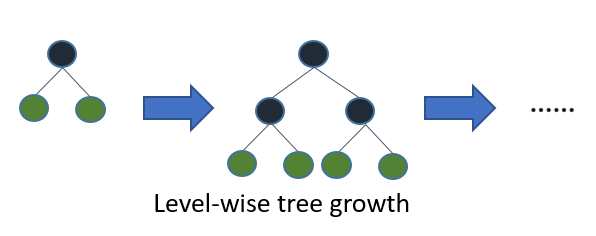

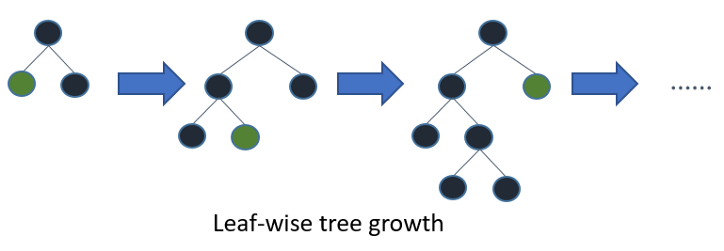

In [69]:
# %pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [74]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3939, number of negative: 1258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757937 -> initscore=1.141404
[LightGBM] [Info] Start training from score 1.141404


LGBMClassifier()

In [75]:
scores = cross_validate(lgb_clf, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

[LightGBM] [Info] Number of positive: 3151, number of negative: 1006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757999 -> initscore=1.141738
[LightGBM] [Info] Start training from score 1.141738
[LightGBM] [Info] Number of positive: 3151, number of negative: 1007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 4158, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757816 -> initscore=1.140744
[LightGBM] [Info] Start training from score 1.140744
[LightGBM] [Info] Number o

/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier wa

In [77]:
pred = lgb_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.8730769230769231


/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## - CatBoost

CatBoost는 Categorical Boosting의 약자입니다. 범주 형 변수를 숫자로 변환 할 필요없이 자동으로 처리하는 뛰어난 기능이 있습니다.

CatBoost는 5 가지 부스팅 알고리즘 중 가장 최근에 개발되었지만 Light Gbm에 매우 가깝습니다. 범주 형 변수가있을 때 더 잘 수행됩니다.

In [80]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(X_train, y_train)

Learning rate set to 0.020824
0:	learn: 0.6702044	total: 57.6ms	remaining: 57.5s
1:	learn: 0.6493376	total: 58.6ms	remaining: 29.2s
2:	learn: 0.6311802	total: 59.6ms	remaining: 19.8s
3:	learn: 0.6125297	total: 60.5ms	remaining: 15.1s
4:	learn: 0.5966567	total: 61.6ms	remaining: 12.2s
5:	learn: 0.5801122	total: 62.5ms	remaining: 10.4s
6:	learn: 0.5678174	total: 63.5ms	remaining: 9s
7:	learn: 0.5543457	total: 64.4ms	remaining: 7.98s
8:	learn: 0.5408797	total: 65.3ms	remaining: 7.19s
9:	learn: 0.5288259	total: 66.3ms	remaining: 6.56s
10:	learn: 0.5167909	total: 67.3ms	remaining: 6.05s
11:	learn: 0.5051167	total: 68.2ms	remaining: 5.61s
12:	learn: 0.4949978	total: 69ms	remaining: 5.24s
13:	learn: 0.4845961	total: 69.9ms	remaining: 4.93s
14:	learn: 0.4746650	total: 70.8ms	remaining: 4.65s
15:	learn: 0.4652639	total: 71.7ms	remaining: 4.41s
16:	learn: 0.4570255	total: 72.6ms	remaining: 4.2s
17:	learn: 0.4496897	total: 73.4ms	remaining: 4.01s
18:	learn: 0.4430102	total: 74.3ms	remaining: 3.83

In [81]:
pred = cat_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.8723076923076923


In [82]:
scores = cross_validate(cat_clf, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

Learning rate set to 0.018932
Learning rate set to 0.018932
Learning rate set to 0.01893
Learning rate set to 0.01893
Learning rate set to 0.018932
0:	learn: 0.6727330	total: 58.8ms	remaining: 58.7s
0:	learn: 0.6721877	total: 59.6ms	remaining: 59.5s
1:	learn: 0.6526651	total: 60.5ms	remaining: 30.2s
1:	learn: 0.6541905	total: 60.5ms	remaining: 30.2s
2:	learn: 0.6355998	total: 61.2ms	remaining: 20.3s
2:	learn: 0.6384858	total: 61.2ms	remaining: 20.3s
3:	learn: 0.6188865	total: 61.9ms	remaining: 15.4s
3:	learn: 0.6220489	total: 61.9ms	remaining: 15.4s
4:	learn: 0.6075906	total: 62.5ms	remaining: 12.4s
4:	learn: 0.6041533	total: 62.6ms	remaining: 12.4s
5:	learn: 0.5926971	total: 63.2ms	remaining: 10.5s
5:	learn: 0.5894718	total: 63.3ms	remaining: 10.5s
6:	learn: 0.5768525	total: 63.9ms	remaining: 9.07s
6:	learn: 0.5803243	total: 63.9ms	remaining: 9.06s
0:	learn: 0.6723811	total: 55.4ms	remaining: 55.3s
7:	learn: 0.5632927	total: 64.6ms	remaining: 8.01s
7:	learn: 0.5680085	total: 64.6ms	re

## 비교

정확도 측면에서 성능은 다양한 부스팅 방법에서 매우 일관됩니다. CatBoost는 정확도가 가장 높지만 차이는 미미합니다. 런타임 성능 측면에서 Light Gbm은 실행 속도가 가장 빠르며 정확도도 가장 높습니다.

Gradient Boosting은 런타임 측면에서 잘 수행되지 않았으며 정확도가 가장 낮습니다 (AdaBoost보다 약간 낮음). Light Gbm이이 운동의 챔피언 인 것 같습니다.

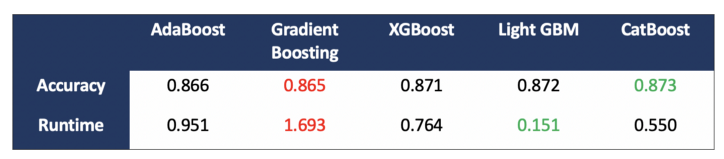

개인적으로 성능 / 속도 이점과 모델 튜닝을위한 많은 매개 변수 때문에 Light GBM 및 CatBoost를 사용하는 것이 좋습니다.

예측 변수에 범주 형 변수가 많을 때 CatBoost가 더 잘 수행됩니다. 범주 형 변수에는 텍스트, 오디오 및 이미지가 포함됩니다. 또한 범주 형 변수를 변환하는 수고를 덜어줍니다.

Light GBM은 CatBoost보다 모델 훈련 속도가 더 빠릅니다. 동시에 정확도 수준을 희생하지 않습니다. 대규모 데이터 세트와 비교적 적은 범주 형 예측 변수가있는 경우 LightGBM을 사용하도록 선택할 수 있습니다.

계속 작업

1. 비교는 30k 행의 데이터에서 수행됩니다. 데이터 세트는 편향 될 수 있으며 크기는 그다지 크지 않습니다. make_classification 패키지 를 사용하여 더 큰 분류 데이터 세트를 사용해 볼 수 있습니다.
1. 이 연습은 단지 분류를위한 것이며 회귀 측면을 시도해 볼 수도 있습니다.
3. 모델 성능 평가 측면에서 정확도와 런타임 만 사용되며 ROC 점수, F1 점수, 재현율, 정밀도와 같은 다른 분류 평가를 사용하여 전체 그림을 볼 수도 있습니다.
4. 모델링에서 가장 시간이 많이 걸리는 부분은 하이퍼 파라미터 튜닝입니다. 현재 연습이나 비교에는 하이퍼 파라미터 튜닝 부분이 포함되지 않았습니다. 나는 그것에 대한 새로운 기사를 가질 것입니다.

이것은 다양한 유형의 부스팅 방법에 대한 매우 기본적인 개요입니다. 각 방법에 대해 더 많이 읽고 몇 가지 데이터 세트에서 모델을 시도하여 더 이해할 수 있습니다.

또한 부스팅은 앙상블 학습 알고리즘 중 하나 일뿐입니다. 앙상블 학습에 대해 더 알고 싶다면 아래 기사를 참조하십시오.


---

참고
 - 혼자 공부하는 머신러닝+딥러닝
